In [24]:
import keras
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
keras.__version__
from keras.applications import VGG16
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt

In [2]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

W0709 20:54:36.871384 140668730091328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 20:54:36.890577 140668730091328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 20:54:36.893232 140668730091328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0709 20:54:36.923034 140668730091328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0709 20:54:37.876092 140668730091328 deprecation_wrapp

In [4]:
base_dir = '/home/jose/Desktop/ship_dataset_6500_1000_625_yacht_tanker'

In [5]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [13]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                131088    
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total para

In [15]:
conv_base.trainable = False

In [16]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [17]:
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 13000 images belonging to 2 classes.


In [19]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [20]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [21]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/30
 - 233s - loss: 0.7505 - acc: 0.5010 - val_loss: 0.6925 - val_acc: 0.5410
Epoch 2/30
 - 232s - loss: 0.6920 - acc: 0.5230 - val_loss: 0.6758 - val_acc: 0.6220
Epoch 3/30
 - 220s - loss: 0.6672 - acc: 0.5760 - val_loss: 0.6508 - val_acc: 0.7120
Epoch 4/30
 - 218s - loss: 0.6568 - acc: 0.5715 - val_loss: 0.6247 - val_acc: 0.7510
Epoch 5/30
 - 218s - loss: 0.6439 - acc: 0.6035 - val_loss: 0.6136 - val_acc: 0.7770
Epoch 6/30
 - 218s - loss: 0.6243 - acc: 0.6250 - val_loss: 0.5727 - val_acc: 0.8300
Epoch 7/30
 - 218s - loss: 0.6273 - acc: 0.6205 - val_loss: 0.5821 - val_acc: 0.8120
Epoch 8/30
 - 218s - loss: 0.6136 - acc: 0.6395 - val_loss: 0.5633 - val_acc: 0.8490
Epoch 9/30
 - 218s - loss: 0.6020 - acc: 0.6475 - val_loss: 0.5455 - val_acc: 0.8450
Epoch 10/30
 - 218s - loss: 0.5977 - acc: 0.6620 - val_loss: 0.5287 - val_acc: 0.8660
Epoch 11/30
 - 219s - loss: 0.5862 - acc: 0.6635 - val_loss: 0.5125 - val_acc: 0.8700
Epoch 12/30
 - 218s - loss: 0.5778 - acc: 0.6790 - val_loss: 0.

In [22]:
model.save('overfitting_adding_droupout_feature_extraction_1.h5')

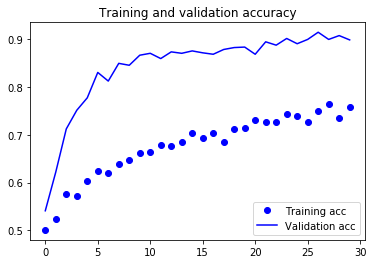

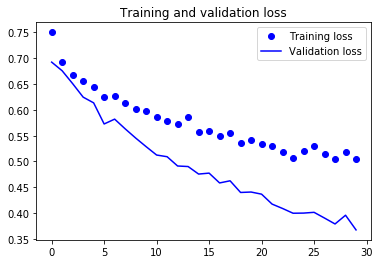

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 2 classes.
test acc: 0.9319999921321869
